In [1]:
import pandas as pd
import os

print("--- Starting Data Loading Process ---")

# Define the relative path to your data directory.
# '../' means 'go up one directory level' from our current location ('notebooks')
# to the main project folder ('Tiger'), and then go into the 'data' folder.
data_path = '../data'

# Create a dictionary to hold all your dataframes
datasets = {
    "customers": "olist_customers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "payments": "olist_order_payments_dataset.csv",
    "reviews": "olist_order_reviews_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "products": "olist_products_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

dfs = {} # This will store the loaded dataframes

try:
    for name, filename in datasets.items():
        file_path = os.path.join(data_path, filename)
        dfs[name] = pd.read_csv(file_path)
        print(f"✅ Successfully loaded {filename} as '{name}_df'")
except FileNotFoundError as e:
    print(f"❌ ERROR: {e}. Please ensure all CSV files are in the '{data_path}' directory.")

# --- Quick Inspection of Key DataFrames ---
# Let's inspect a few to make sure they loaded correctly.

print("\n\n--- 1. Orders DataFrame ('orders_df') ---")
print(f"Shape: {dfs['orders'].shape}")
dfs['orders'].info()
print(dfs['orders'].head())

print("\n\n--- 2. Customers DataFrame ('customers_df') ---")
print(f"Shape: {dfs['customers'].shape}")
dfs['customers'].info()
print(dfs['customers'].head())

print("\n\n--- 3. Order Items DataFrame ('order_items_df') ---")
print(f"Shape: {dfs['order_items'].shape}")
dfs['order_items'].info()
print(dfs['order_items'].head())


--- Starting Data Loading Process ---
✅ Successfully loaded olist_customers_dataset.csv as 'customers_df'
✅ Successfully loaded olist_geolocation_dataset.csv as 'geolocation_df'
✅ Successfully loaded olist_order_items_dataset.csv as 'order_items_df'
✅ Successfully loaded olist_order_payments_dataset.csv as 'payments_df'
✅ Successfully loaded olist_order_reviews_dataset.csv as 'reviews_df'
✅ Successfully loaded olist_orders_dataset.csv as 'orders_df'
✅ Successfully loaded olist_products_dataset.csv as 'products_df'
✅ Successfully loaded olist_sellers_dataset.csv as 'sellers_df'
✅ Successfully loaded product_category_name_translation.csv as 'category_translation_df'


--- 1. Orders DataFrame ('orders_df') ---
Shape: (99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       994

In [2]:
# In a new cell in your notebook, after loading the data...

# Convert date columns from 'object' to 'datetime'
# We use errors='coerce' to turn any problematic dates into NaT (Not a Time)
dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'], errors='coerce')
dfs['orders']['order_approved_at'] = pd.to_datetime(dfs['orders']['order_approved_at'], errors='coerce')
dfs['orders']['order_delivered_carrier_date'] = pd.to_datetime(dfs['orders']['order_delivered_carrier_date'], errors='coerce')
dfs['orders']['order_delivered_customer_date'] = pd.to_datetime(dfs['orders']['order_delivered_customer_date'], errors='coerce')
dfs['orders']['order_estimated_delivery_date'] = pd.to_datetime(dfs['orders']['order_estimated_delivery_date'], errors='coerce')

# Verify the change
print("--- Updated Orders DataFrame Info ---")
dfs['orders'].info()

--- Updated Orders DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [3]:
# Check for missing values in the orders table
print("\nMissing values in Orders table:")
print(dfs['orders'].isnull().sum())


Missing values in Orders table:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [4]:
# Step 1: Merge orders with order_items
merged_df = pd.merge(
    left=dfs['orders'],
    right=dfs['order_items'],
    on='order_id',
    how='inner' # 'inner' join means we only keep rows that have a match in both tables
)

# Step 2: Merge the result with customers
merged_df = pd.merge(
    left=merged_df,
    right=dfs['customers'],
    on='customer_id',
    how='inner'
)

# Display the first few rows and info of your new master DataFrame
print("\n--- Master DataFrame Head ---")
print(merged_df.head())

print("\n--- Master DataFrame Info ---")
merged_df.info()


--- Master DataFrame Head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 1

In [5]:
# Calculate the difference between delivery and purchase time
delivery_time = merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']

# The result is in a 'timedelta' format. Let's convert it to a number (days).
# We'll use .dt.total_seconds() / (24 * 60 * 60) to get a more precise decimal value for days.
merged_df['delivery_time_days'] = delivery_time.dt.total_seconds() / (24 * 60 * 60)

# Display the first few rows with the new column
print(merged_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']].head())

  order_purchase_timestamp order_delivered_customer_date  delivery_time_days
0      2017-10-02 10:56:33           2017-10-10 21:25:13            8.436574
1      2018-07-24 20:41:37           2018-08-07 15:27:45           13.782037
2      2018-08-08 08:38:49           2018-08-17 18:06:29            9.394213
3      2017-11-18 19:28:06           2017-12-02 00:28:42           13.208750
4      2018-02-13 21:18:39           2018-02-16 18:17:02            2.873877


In [6]:
# Calculate the difference between estimated and actual delivery
delivery_diff = merged_df['order_estimated_delivery_date'] - merged_df['order_delivered_customer_date']

# Convert the difference to days
merged_df['delivery_diff_days'] = delivery_diff.dt.total_seconds() / (24 * 60 * 60)

# A positive value means the order was delivered early.
# A negative value means the order was delivered late.
print(merged_df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'delivery_diff_days']].head())

  order_estimated_delivery_date order_delivered_customer_date  \
0                    2017-10-18           2017-10-10 21:25:13   
1                    2018-08-13           2018-08-07 15:27:45   
2                    2018-09-04           2018-08-17 18:06:29   
3                    2017-12-15           2017-12-02 00:28:42   
4                    2018-02-26           2018-02-16 18:17:02   

   delivery_diff_days  
0            7.107488  
1            5.355729  
2           17.245498  
3           12.980069  
4            9.238171  


In [7]:
# Extract month name
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.month_name()

# Extract day of the week name
merged_df['purchase_day_of_week'] = merged_df['order_purchase_timestamp'].dt.day_name()

print(merged_df[['order_purchase_timestamp', 'purchase_month', 'purchase_day_of_week']].head())

  order_purchase_timestamp purchase_month purchase_day_of_week
0      2017-10-02 10:56:33        October               Monday
1      2018-07-24 20:41:37           July              Tuesday
2      2018-08-08 08:38:49         August            Wednesday
3      2017-11-18 19:28:06       November             Saturday
4      2018-02-13 21:18:39       February              Tuesday


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style for our plots
sns.set_style('whitegrid')

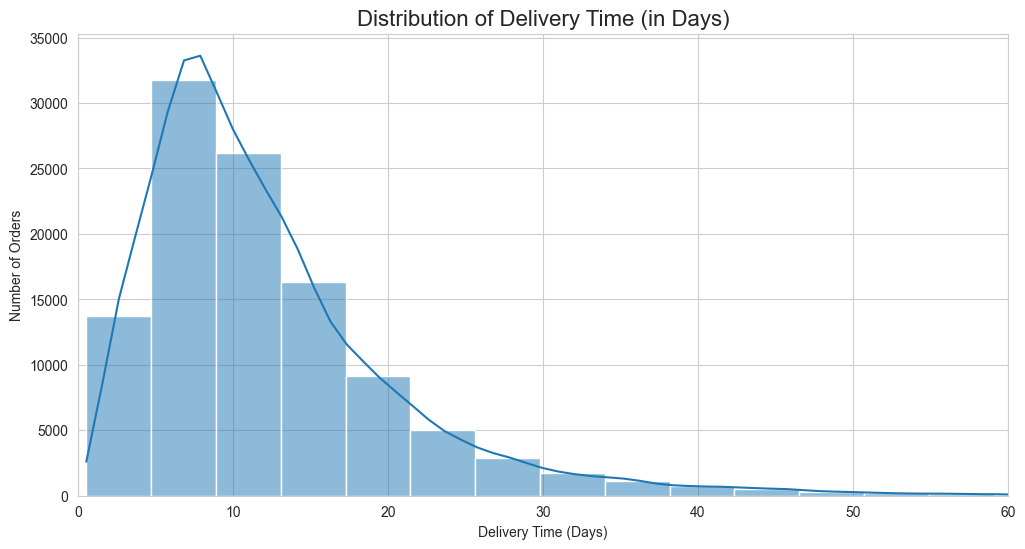

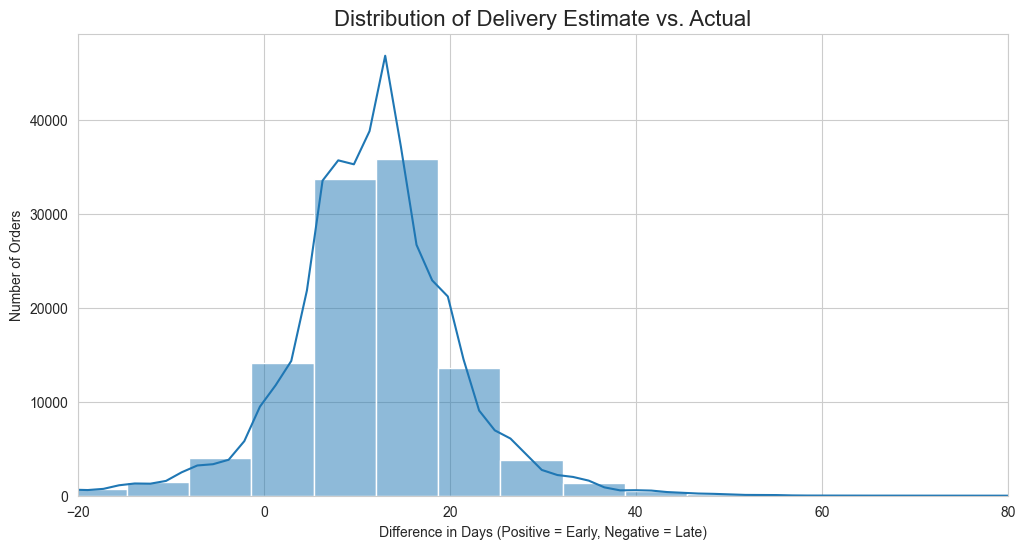

In [9]:
# --- How long does delivery take? ---
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='delivery_time_days', bins=50, kde=True)
plt.title('Distribution of Delivery Time (in Days)', fontsize=16)
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Number of Orders')
plt.xlim(0, 60) # Focus on the most common delivery times
plt.show()

# --- How well are we meeting estimates? ---
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='delivery_diff_days', bins=50, kde=True)
plt.title('Distribution of Delivery Estimate vs. Actual', fontsize=16)
plt.xlabel('Difference in Days (Positive = Early, Negative = Late)')
plt.ylabel('Number of Orders')
plt.xlim(-20, 80) # Focus on the most common range
plt.show()

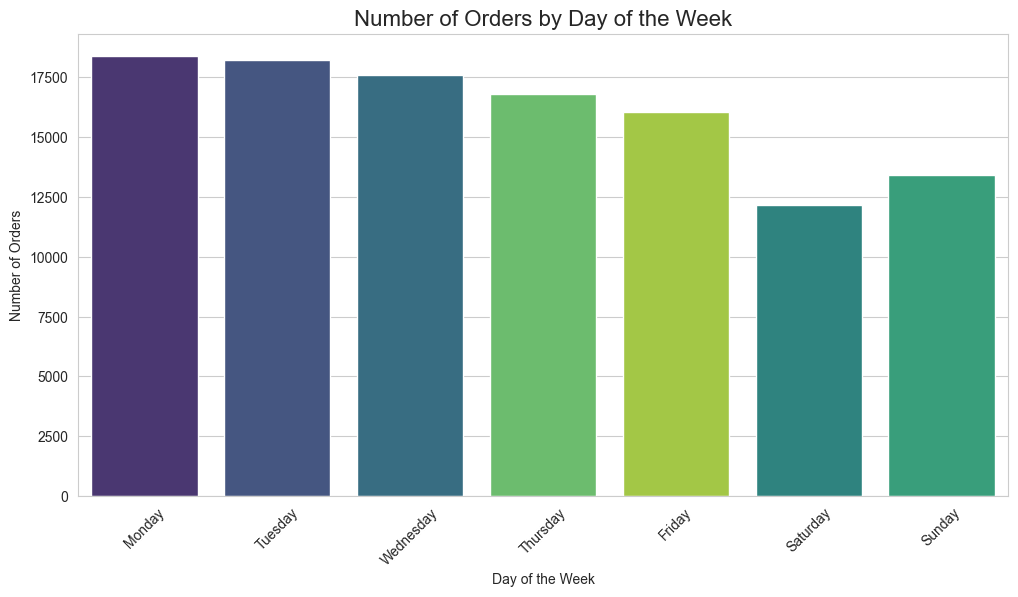

In [11]:
# --- What is the busiest day of the week for purchases? ---
plt.figure(figsize=(12, 6))

# Define the correct order for the days of the week for a logical chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# The updated, future-proof way to write the same command
sns.countplot(data=merged_df, x='purchase_day_of_week', order=day_order, hue='purchase_day_of_week', palette='viridis', legend=False)
plt.title('Number of Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) # Rotate labels for better readability
plt.show()